# MagmaSat+: A comprehensive model for mixed volatile (H$_2$O-CO$_2$) solubility in silicate melts – A python library within the ENKI framework
## (For Earth and Space Sciences, an AGU Journal)
***
## Kayla Iacovino$^1$, Simon Matthews$^2$, Florence Bégué$^3$, Christy Till$^4$  and ??? Peter Fox? Mark Ghiorso? Aaron Wolf?
$^1$Jacobs/NASA Johnson Space Center
<br>$^2$Simon affiliation
<br>$^3$Florence affiliation
<br>$^4$School of Earth and Space Exploration (SESE), Arizona State University, Phoenix, AZ

Move this text...

Based on Mark Ghiorso's MELTS-v1.2.0-equilibrium example notebook written by Kayla Iacovino and Florence Bégué
    
Objective #1 - input multiple melt compositions (.xlsx file or other format)and compute H2O and CO2 of the melt and fluid for a given P and T _**(Working!)**_
<br> Objective #2 - print these composition in a .xlsx (or other format) file _**(In progress - output problems)**_

***

# Key Points
1. First key point
2. Second
3. Third

# Abstract

# Plain Language Summary

# 1. Introduction
Standard volatile preamble

History of volatile solubility models

Currently available tools and issues: Dixon (1995); Dixon (1997); Shishkina et al (2014); Iacono_marziano (2012); Egucghi and Dasgupta (2018); Zhang and Duan (2009); Allison et al (2019); Papale; MagmaSat; SolEx


# 2. Research Methodology

Preamble text

MagmaSat determines the saturation conditions for a mixed H2O-CO2 fluid in natural composition silicate melts <cite data-cite="ghiorso_gualsa2015">(Ghiorso & Gualda, 2015)</cite>

* Volatile-dependent crystallization paths
* Interpretation of melt inclusion volatile contents
e.g. estimating depths of degassing, understanding how volatiles fuel eruptions

MagmaSat+ is a rewrite of the MagmaSat app and based on the thermodynamic model of <cite data-cite="ghiorso_gualsa2015embed">Ghiorso & Gualda (2015)</cite>. Our implementation in the ENKI framework based on Mark’s MELTS-v.1.2.0-equilibrium example notebook (ENKI Equilibrate package).

MagmaSat+ is a volatile-focused tool capable of producing outputs relevant to volatile solubility and degassing processes


The notebook features the follow workflow and capabilities:
* Read in melt composition from an excel spreadsheet
* Ability to model multiple liquid compositions at once
* Advanced plotting capabilities
* Saturation curves (isobars) and isopleths 
* Degassing paths
* Capabilities readily extensible by the user

Note:
* No volatile calculator can do these things!
* With the ENKI framework, implementation is relatively simple!


# 3. Workable example uses

Some text describing how ot use the below examples.

Requirements of the input file:
Oxides named as SiO2, TiO2, etc (list all)
temperature column, if present, named Temp

Units for temp, press, composition (wt%)

### 3.0.1 Initialize packages and choose model

Some text about what this step is doing.

Create a MELTS v 1.2.0 instance
Rhyolite-MELTS version 1.0.2 is the default model.

Have a model = "model" type line that makes user define what model they are using at this stage. That way, in functino calls below, I can simply have model=model as args

In [1]:
import MagmaSatPlus as msp
from thermoengine import equilibrate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#Create a Modeller object where the user defines the model name and version to use for calculatinos
model = msp.Modeller('MagmaSat','1.2.0')

## Listing 1. Generated information about the implemented model: oxides included and their properties.

In [2]:
oxides = model.melts.get_oxide_names()
phases = model.melts.get_phase_names()
props = model.melts.get_list_of_properties()
print (oxides)
# print (phases)
print(props)

['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2']
['Mass', 'GibbsFreeEnergy', 'Enthalpy', 'Entropy', 'HeatCapacity', 'DcpDt', 'Volume', 'DvDt', 'DvDp', 'D2vDt2', 'D2vDtDp', 'D2vDp2', 'Density', 'Alpha', 'Beta', 'K', "K'", 'Gamma']


### 3.0.2 Load in data

Some text explaining that all examples will use these data. These cells must be executed to run the rest of the notebook.

Input initial composition of the system (liquid) in wt% or grams of oxides

Excel spreadsheet (MagmaSat2018-input.xlsx) with melt inclusion compositions (in wt%) - The Excel spreadsheet needs to be in the same folder as the notebook

## Table 1. User input data for melt inclusions
The first ten rows of the user input data. The number of lines shown can be adjusted in the code below by changing the value in "head(10)" to any number.  Execute the below cell to display Table 1.

In [3]:
myfile = msp.ExcelFile('MagmaSat2018-input.xlsx') #Enter your filename here
data = myfile.data

#Uncomment the line below to see your data
#print(data)

## 3.1 Example 1: Plotting user input data
Plotting data without performing any operations/modeling.

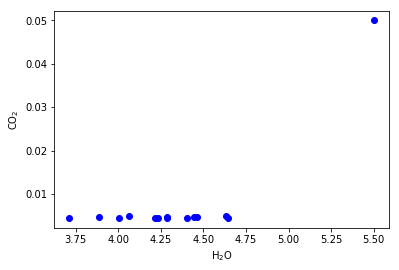

In [4]:
plt.plot(data["H2O"], data["CO2"], 'bo')
plt.xlabel("H$_2$O")
plt.ylabel("CO$_2$")
plt.show()

## 3.2. Example 2: Plotting isobars and isopleths
Plot isobars and isopleths for any given composition.

This is done for one composition at a time. The user can input that data here OR pull from the input spreadsheet. Execute only one of the following two cells (Note: can we number cells to refer to them in text?)

In [5]:
#To get composition from a specific sample in the input data:
SampleName = 'BT-ex'
bulk_comp = myfile.get_sample_oxide_comp(SampleName)
feasible = model.melts.set_bulk_composition(bulk_comp)

#Uncomment the line below to print the sample composition
print(bulk_comp) 

test = pd.DataFrame([v for v in bulk_comp.values()], columns = ['value'],
                    index = [k for k in bulk_comp.keys()])
test

{'Al2O3': 12.5, 'Fe2O3': 0.207, 'CaO': 0.43, 'SiO2': 77.5, 'Cr2O3': 0.0, 'MnO': 0.0, 'Na2O': 3.98, 'H2O': 5.5, 'TiO2': 0.08, 'P2O5': 0.0, 'FeO': 0.473, 'MgO': 0.03, 'CO2': 0.05, 'CoO': 0.0, 'NiO': 0.0, 'K2O': 4.88}


,value
Al2O3,12.500
Fe2O3,0.207
CaO,0.430
SiO2,77.500
Cr2O3,0.000
MnO,0.000
Na2O,3.980
H2O,5.500
TiO2,0.080
P2O5,0.000


In [22]:
output = 0
output = model.melts.equilibrate_tp(900.0, 1.0, initialize=True)
(status, temp, i, xmlout) = output[0]
liq_comp = model.melts.get_composition_of_phase(xmlout, phase_name='Liquid')
#model.melts.output_summary(xmlout)
print(liq_comp)

{'H2O': 5.17127741896744, 'TiO2': 0.0757793294709666, 'Fe2O3': 0.196079015006495, 'SiO2': 73.4112254250021, 'FeO': 0.448045285496825, 'MgO': 0.0284172485516133, 'CO2': 0.0287814128490724, 'CaO': 0.407313895906472, 'K2O': 4.62253909772916, 'Na2O': 3.77002164118075, 'Al2O3': 11.8405202298391}


In [ ]:
# #Uncomment this entire cell to execute the code below.

# #To manually input a bulk composition, fill in the oxides in wt% below:
# bulk_comp = {'SiO2':  77.5, 
#                'TiO2':   0.08, 
#                'Al2O3': 12.5, 
#                'Fe2O3':  0.207,
#                'Cr2O3':  0.0, 
#                'FeO':    0.473, 
#                'MnO':    0.0,
#                'MgO':    0.03, 
#                'NiO':    0.0, 
#                'CoO':    0.0,
#                'CaO':    0.43, 
#                'Na2O':   3.98, 
#                'K2O':    4.88, 
#                'P2O5':   0.0, 
#                'H2O':    10.0,
#                'CO2':    1.0}

# feasible = model.melts.set_bulk_composition(bulk_comp)

Next, conditions over which to calculate isobars and isopleths must be specified. The generated plot is isothermal, so only one temperature can be chosen. Isobars can be calculated for any number of pressures. These are specified by either: listing all desired pressures; or by defining minimum and maximum pressures as well as the interval between each pressure step. For example, if it is desired to plot isobars every 100 MPa, from 100 to 500 MPa, input can either be a list of all pressures (100, 200, 300, 400, 500) or minimum temperature, maximum temperature, and temperature interval can be separately defined as 100, 500, and 100, respectively.

In [ ]:
temperature = 1000.0

#Use the below lines to define pressures as minimum, maximum, and interval:
pressure_min = 100.0
pressure_max = 500.0
pressure_int = 100.0

#Alternatively, pressures can be defined individually as a list:
pressures = [100.0, 200.0, 300.0, 400.0, 500.0]

Next, the H$_2$O and CO$_2$ dissolved in the melt at saturation is calculated at the specified temperature and over the range of specified pressures. The user does not need to change anything in the below cell.

In [ ]:
isobars = model.calculate_isobars_and_isopleths(bulk_comp, temperature, print_status=True, pressure_min=pressure_min, pressure_max=pressure_max, pressure_int=pressure_int)

In [ ]:
#This can be done with one built-in call, as:
model.plot_isobars_and_isopleths(isobars)

However, the user may wish to apply custom formatting to the plot, in which case, the code to plot isobars and isopleths is provided below.

In [ ]:
# # Uncomment this entire cell to execute the code below...

# #-----------------------CODE TO PLOT ISOBARS AND ISOPLETHS-----------------#
# #First, we must define the pressure values used
# P_vals = isobars_df.Pressure.unique()

# #Then, the isobar data is turned from a pandas DataFrame into a list of lists for easier parsing:
# isobars_lists = isobars_df.values.tolist()

# #make a list of isopleth values to plot
# iso_step = 20.0
# isopleth_vals = np.arange(0+iso_step,100.0,iso_step)

# #add zero values to volatiles list
# volatiles_at_saturation.append([0.0,0.0,0.0,0.0])

# #draw the figure
# fig, ax1 = plt.subplots()

# #turn on interactive plotting and make some labels
# plt.ion()
# plt.xlabel('H2O wt%')
# plt.ylabel('CO2 wt%')

# #Plot your data
# for pressure in P_vals:
#     ax1.plot([item[1] for item in isobars_lists if item[0] == pressure], 
#              [item[2] for item in isobars_lists if item[0] == pressure])

# for val in isopleth_vals:
#     val_min = val-1.0
#     val_max = val+1.0
#     x_vals_iso = [item[1] for item in isobars_lists if val_min <= item[3] <= val_max]
#     x_vals_iso.append(0)
#     x_vals_iso = sorted(x_vals_iso)
#     x_vals_iso = np.array(x_vals_iso)
#     y_vals_iso = [item[2] for item in isobars_lists if val_min <= item[3] <= val_max]
#     y_vals_iso.append(0)
#     y_vals_iso = sorted(y_vals_iso)
#     y_vals_iso = np.array(y_vals_iso)
    
#     ax1.plot(x_vals_iso, y_vals_iso, ls='dashed', color='k') #format the isopleths

# #Create a legend for the plot
# labels = P_vals
# ax1.legend(labels)

## 3.3. Example 3: Saturation pressures
And examples to use different models.

In [ ]:
#Test passing an ExcelFile object
pressures = model.calculate_saturation_pressure(myfile, 900.0)
# print(pressures)

## 3.4. Example 4: Equilibrium fluid compositions
And examples to use different models.

## 3.5. Example 5: Plotting degassing paths

Define open vs closed system degassing.

## 3.6. Exporting data

## Post processing of input table to generate a plot

In [ ]:
# transform input table into a data array
compo = np.array(compo_input)

# plot melt H2O-CO2
compo_H2O = compo[:,14]
compo_CO2 = compo[:,15]*10000    # converted CO2 in ppm
plt.scatter(compo_H2O, compo_CO2)
axes = plt.gca
# plt.axis([2,6,0,800])
plt.xlabel('$H_2O$(wt.%)')
plt.ylabel('$CO_2$ (ppm)')
# plt.title('H2O vs. CO2')
plt.show()

## Figure 1. Caption - note, the plot needs to be tidied up, biggger, etc. for publication quality

***
## Calculate Fluid + Magma from a melt composition

Suppress all phases except for Liquid and Fluid etc.

## Listing 4 (? - auto numbering?)

In [ ]:
b = melts.get_phase_inclusion_status()
for phase in phases:
    melts.set_phase_inclusion_status({phase:False})

#set only Fluid and Liquid to True
melts.set_phase_inclusion_status({'Liquid':True, 'Fluid':True})

a = melts.get_phase_inclusion_status()

print("Only allowable phases:")
for key, value in a.items():
    if value == True:
        print(key)

## Compute the equilibrium state for a given T (°C) and P (MPa).
Print status of the calculation, and summary output of equilibrium state for each composition in the spreadsheet.

Create a new Excel spreadsheet with output.

In [ ]:
# Enter P/T to compute fluid composition. T in C, P in MPa

temp = 780.0
press = 100.0

# could add some widgets here later on

## Listing 5. ?MELTS diagnostic output generated as the code runs. ?Discuss role of log-type outputs in a notebook that becomes a publication? Perhaps comment out print(status, t, p) in the code?


In [ ]:
wb = melts.start_excel_workbook_with_sheet_name(sheetName="Summary")

for i in range(len(compo)):
    compo_d = dict(zip(oxides,compo[i]))
    feasible = melts.set_bulk_composition(compo_d)
    output = melts.equilibrate_tp(temp, press, initialize=True)  
    (status, t, p, xmlout) = output[0]
    #print(type(output))
    #status-string indicating the status of the calculation: success/failiure, Reason for success/failure
    print (status, t, p)
    output_all = melts.output_summary(xmlout) # this prints the data as well
    print('\n')
    melts.update_excel_workbook(wb, xmlout)
    
melts.write_excel_workbook(wb, 'MagmaSat2018-output.xlsx')

### Results and Analyses
Visualizing and plotting results - <FONT color=red> in progress there is an offset in the output file, plus want to add label, ...</FONT color=red>

## Listing 4. First 10 lines of output saved into an Excel spreadsheet.

In [ ]:
excel_file_2 = 'MagmaSat2018-output.xlsx'
output = pd.read_excel(excel_file_2, sheet_name=1) #sheet 0 = summary data input, sheet 1 = Fluid composition, sheet 2 = magma composition
output.head(10)

# output problems, as not the same column label for each composition, therefore there is an offset in the data

insert code from separate CurvePlotter notebook

# 4. Discussion and Conclusion

# 5. Future Work

# Acknowledgements

# References